In [92]:
import pandas as pd

myfile = 'multidrug_data.csv'

**On importe le fichier multidrug_data qui contient des données d'expressions sur 48 transporteurs ABC en fonction de types de cellules et de cancers**

In [93]:
df = pd.read_csv(myfile, sep='\t', engine='python', header=0).fillna('')
df.columns.values[0:2] = ["cell_line", "cancer_type"]
for i in range(1, len(df.columns)):
    label = df.columns.values[i].replace('/"', '')
    label = label.replace('"/', '')
    df.columns.values[i] = label

**Le fichier est rentré dans un dataframe et les noms de ses colonnes correctement annotées**

In [94]:
row = df.shape[0]
col = df.shape[1]
for i in range(row):
    for j in range(col):
        cell = df.iloc[i][j].replace('/"', '')
        cell = cell.replace('"/', '')
        if cell == '/NA/':
            cell = '0.0'
        df.iloc[[i], [j]] = cell

**Les degrès d'expression sont nettoyés pour apparaitre correctement**

In [95]:
col_names = df.columns.values[2:]

for name in col_names:
    df[name] = df[name].astype(float)

**On convertie les degrès d'expression en nombre réels**

In [96]:
df.pop('cell_line')

0        BT549
1       HS578T
2         MCF7
3     MCF7ADRr
4     MDAMB231
5     MDAMB435
6         MDAN
7         T47D
8        SF268
9        SF295
10       SF539
11       SNB19
12       SNB75
13        U251
14     COLO205
15     HCC2998
16      HCT116
17       HCT15
18        HT29
19        KM12
20       SW620
21     CCRFCEM
22        HL60
23        K562
24       MOLT4
25    RPMI8226
26          SR
27     LOXIMVI
28         M14
29     MALME3M
30      SKMEL2
31     SKMEL28
32      SKMEL5
33     UACC257
34      UACC62
35        A549
36        EKVX
37        H226
38         H23
39       H322M
40        H460
41        H522
42       HOP62
43       HOP92
44      IGROV1
45      OVCAR3
46      OVCAR4
47      OVCAR5
48      OVCAR8
49       SKOV3
50       DU145
51         PC3
52        7860
53        A498
54        ACHN
55       CAKI1
56      RXF393
57       SN12C
58        TK10
59        UO31
Name: cell_line, dtype: object

In [97]:
df.head()

,cancer_type,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,...,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG1,ABCG2,ABCG4,ABCG5,ABCG8
0,BREAST,0.37,-0.67,3.78,-1.13,1.71,2.00,-0.24,-1.11,-1.52,...,-1.26,1.25,1.62,1.05,0.51,-0.68,-0.03,1.37,-0.19,0.89
1,BREAST,-0.50,0.06,-2.88,-0.38,0.44,3.01,-1.65,-1.33,4.54,...,-0.29,0.99,1.16,1.07,0.99,-1.56,0.52,0.60,-0.64,-3.10
2,BREAST,-2.07,0.80,3.79,3.95,0.26,-1.79,-0.83,0.68,-1.61,...,-0.19,-1.22,-0.65,-1.05,-0.63,3.37,1.31,-2.38,0.05,0.81
3,BREAST,0.38,0.47,2.40,-0.76,0.90,0.73,0.92,-3.08,-1.52,...,-0.86,1.35,1.40,0.70,0.56,-1.46,-2.78,-1.86,-0.49,3.18
4,BREAST,0.36,-0.14,0.93,-0.42,0.80,-1.25,0.90,-3.89,-1.07,...,1.54,1.12,1.92,0.20,1.02,0.47,0.59,1.61,0.06,0.27


**On obtient notre jeu de données correctement annoté et ordonné** 

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

**On passe à la visualisation des données**

In [99]:
labels = []
dict_cancer = {}
exp_by_cancer = {}
for label in df['cancer_type']:
    if label not in labels:
        labels.append(label)
        dict_cancer[label] = 1
    else:
        dict_cancer[label] += 1

for transporter in df.columns.values[1:]:
    exp_by_cancer[transporter] = {}
    for cancer_type in labels:
        if cancer_type not in exp_by_cancer[transporter]:
            exp_by_cancer[transporter][cancer_type] = 0
i = 0
for transporter_name in exp_by_cancer.keys():
    i += 1
    for cancer in labels:
        for j in range(row):
            if cancer == df.iloc[j][0]:
                exp_by_cancer[transporter_name][cancer] += df.iloc[j][i]

for key in exp_by_cancer.keys():
    for key_bis in dict_cancer.keys():
        exp_by_cancer[key][key_bis] = exp_by_cancer[key][key_bis]/dict_cancer[key_bis]

**On crée un ditionnaire qui va être rentrer dans un nouveau dataframe, cela représentera la moyenne de degrés d'expression des trasnporteurs en fonction du type de cancer. On appelle ce nouveau dataframe $mean$**

In [100]:
mean = pd.DataFrame.from_dict(exp_by_cancer)
mean.insert(0, "Cancer Type", mean.index.values)
mean

,Cancer Type,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,...,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG1,ABCG2,ABCG4,ABCG5,ABCG8
BREAST,BREAST,-0.475000,0.275000,0.441250,0.190000,0.676250,-0.261250,-0.172500,-0.903750,1.270000,...,0.443750,-0.445000,0.526250,-0.198750,0.156250,0.091250,0.583750,0.461250,-0.336250,1.091250
CNS,CNS,-0.568333,-0.405000,-1.105000,-0.186667,0.118333,-1.248333,0.293333,-1.446667,-1.068333,...,-0.325000,0.620000,0.326667,-0.151667,0.415000,0.396667,0.361667,0.208333,-0.086667,-2.170000
COLON,COLON,-0.814286,-0.421429,-1.388571,-1.560000,-0.131429,-1.005714,0.747143,-1.014286,-0.825714,...,-0.214286,0.725714,-0.420000,0.327143,0.054286,0.015714,1.187143,-0.708571,-0.022857,-0.015714
LEUK,LEUK,0.626667,-0.355000,-0.533333,1.038333,-0.545000,-0.143333,0.740000,0.731667,-1.013333,...,0.475000,0.893333,0.570000,0.875000,-0.233333,1.620000,-1.180000,1.253333,-0.466667,-0.335000
MELAN,MELAN,-0.257500,-0.273750,-4.186250,-1.201250,0.678750,2.310000,-1.358750,0.996250,1.983750,...,0.015000,-0.737500,-0.143750,-0.107500,-0.082500,-0.591250,0.453750,0.372500,1.115000,0.677500
NSCLC,NSCLC,0.070000,0.042222,1.886667,0.648889,0.108889,1.323333,0.236667,1.058889,0.442222,...,-0.410000,-1.152222,-0.382222,-0.228889,-0.265556,0.672222,0.490000,-0.005556,-0.556667,-1.268889
OVAR,OVAR,-0.028333,0.378333,2.241667,1.996667,0.053333,-0.628333,-0.251667,0.155000,-0.733333,...,0.995000,0.296667,-0.488333,-0.428333,-0.106667,-1.713333,-1.388333,0.205000,0.501667,3.038333
PROSTATE,PROSTATE,-0.340000,1.105000,2.505000,1.425000,0.145000,0.170000,0.640000,0.550000,0.350000,...,0.000000,0.620000,-0.375000,0.140000,-0.175000,0.970000,-2.225000,-1.350000,-0.930000,-2.005000
RENAL,RENAL,1.431250,0.332500,1.756250,-0.845000,-1.122500,-1.193750,-0.140000,-0.115000,-1.013750,...,-0.668750,0.332500,0.202500,0.022500,0.161250,-0.737500,-0.415000,-1.117500,0.141250,-0.228750


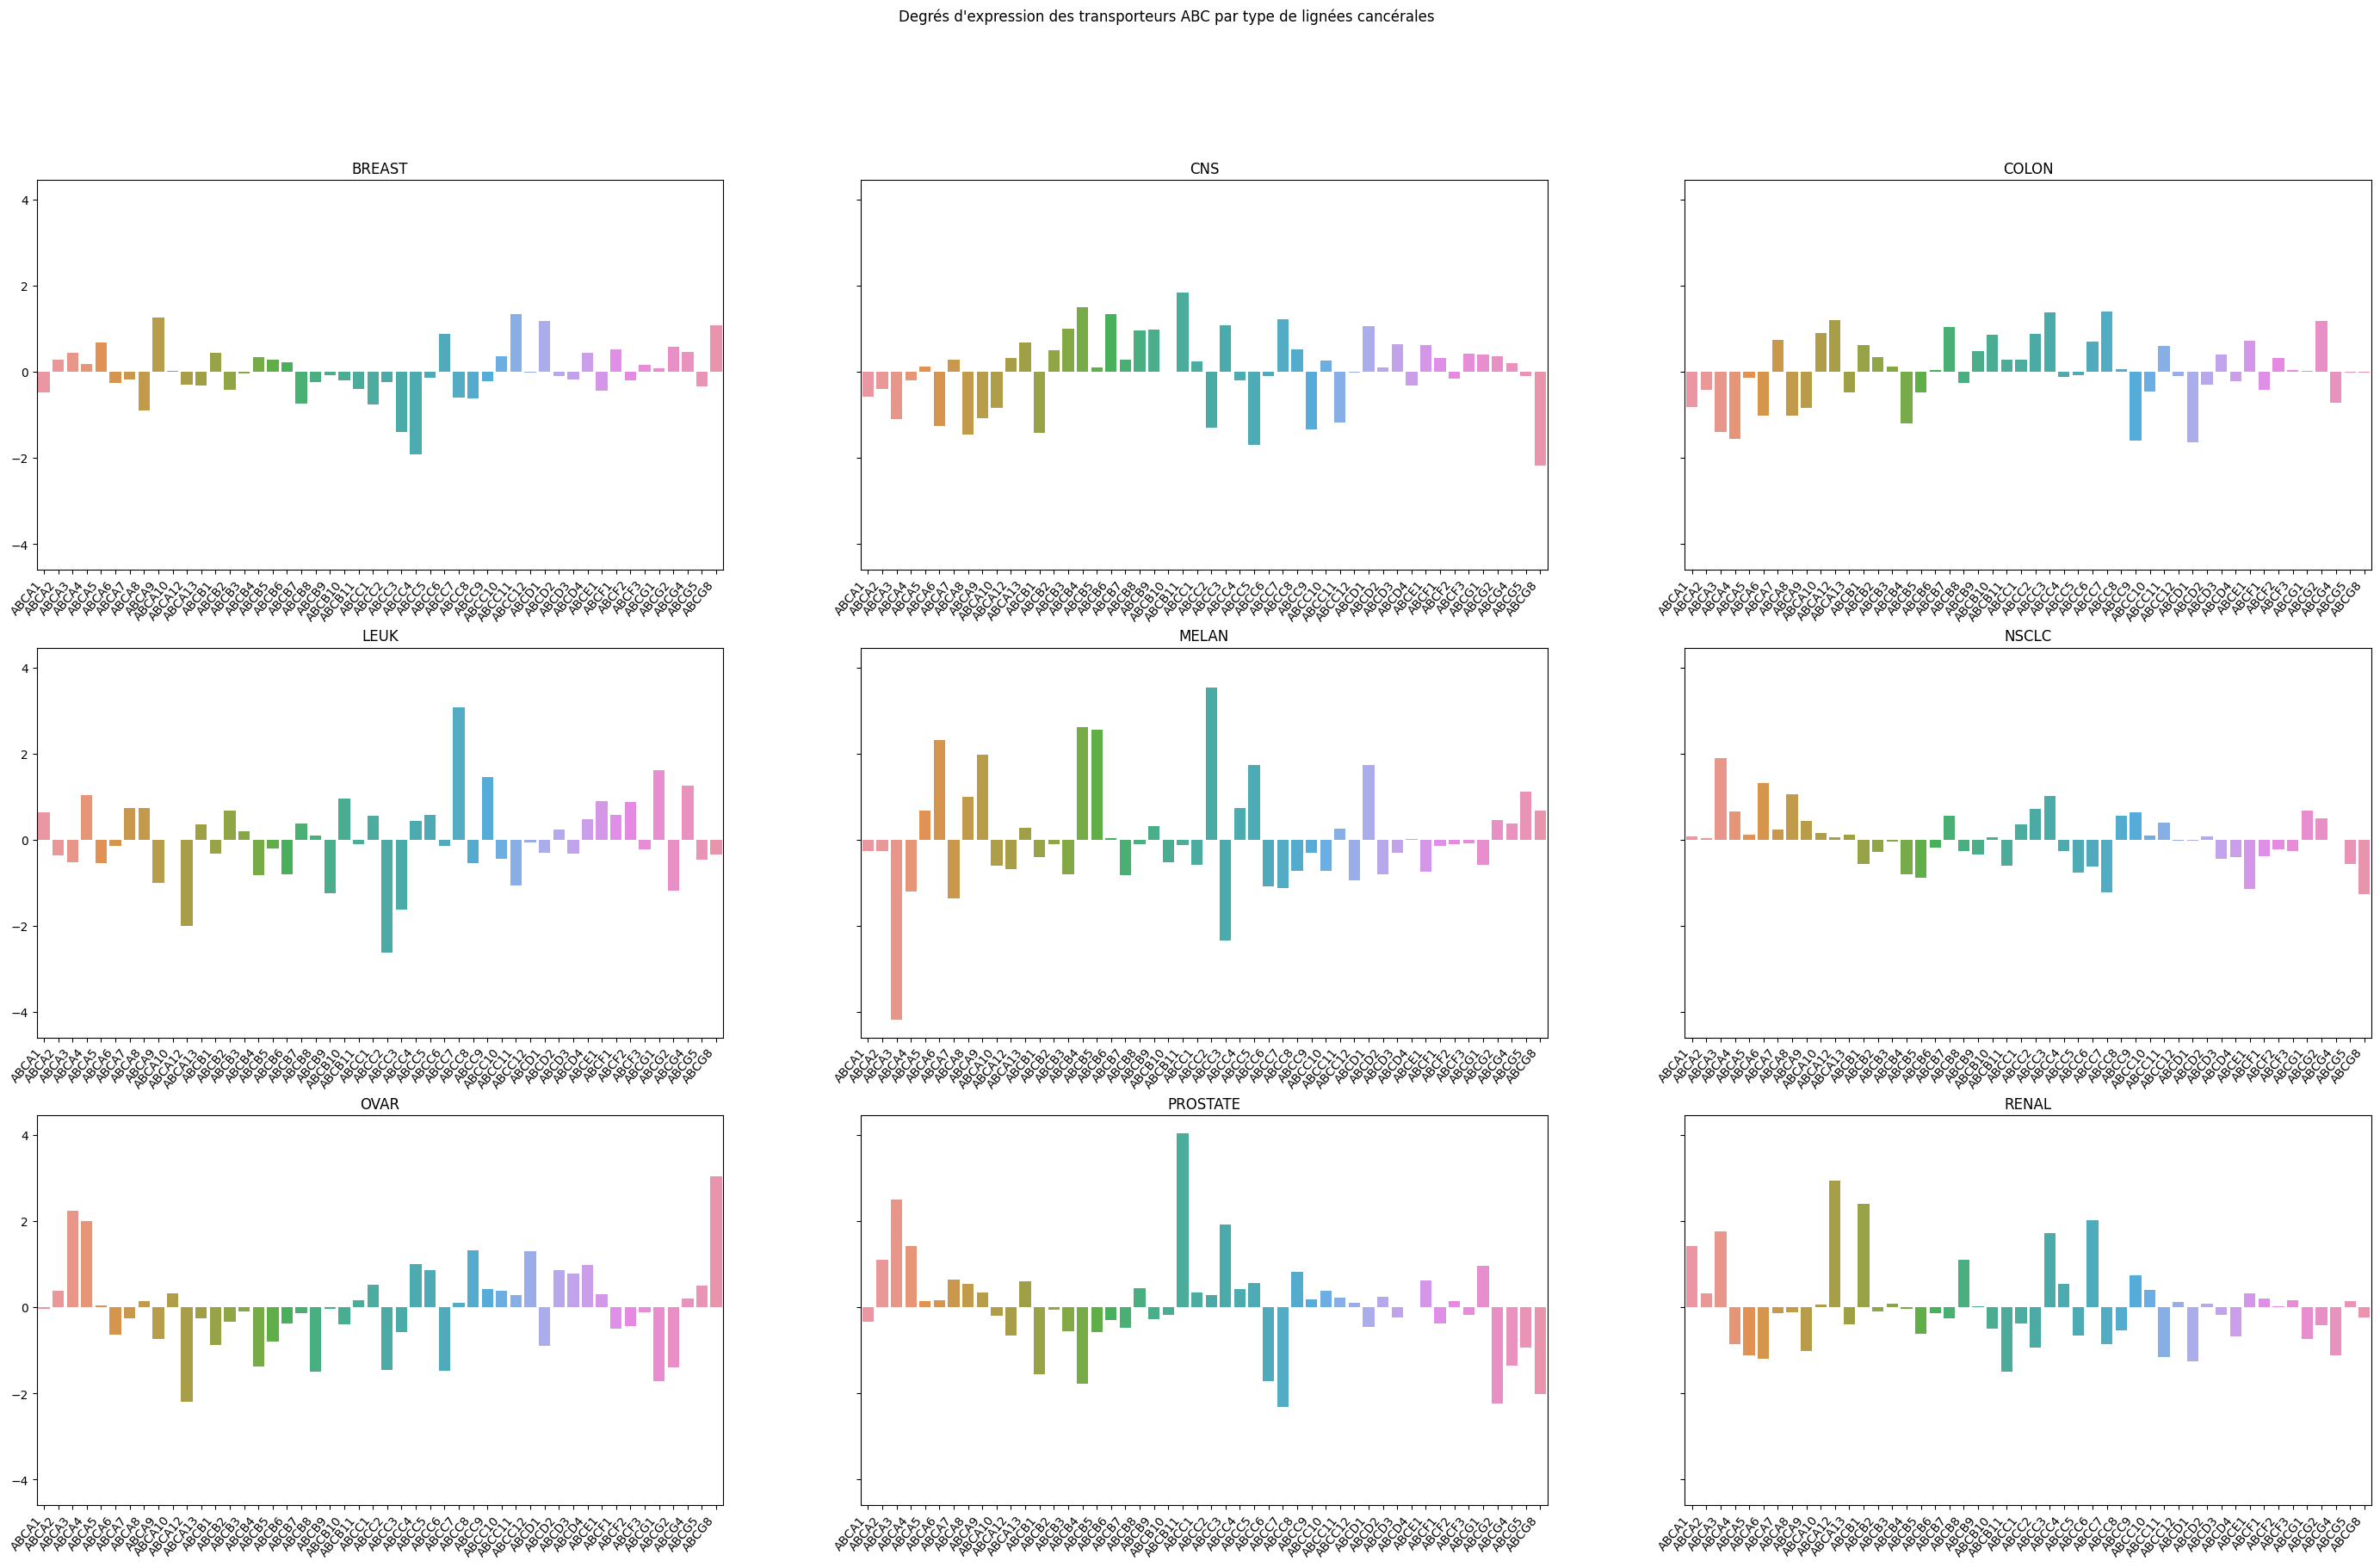

In [101]:
fig, axes = plt.subplots(3, 3, sharey='all', figsize=(35, 20))
fig.suptitle("Degrés d'expression des transporteurs ABC par type de lignées cancérales")
i = 0
j = 0
for name in mean['Cancer Type']:
    sns.barplot(ax=axes[j, i], x=mean.loc[name][1:].index, y=mean.loc[name][1:].values)
    axes[j, i].set_title(mean.loc[name][1:].name)
    axes[j, i].set_xticklabels(rotation=50, ha="right", labels=mean.columns.values[1:])
    if i == 2:
        j += 1
        i = 0
    else:
        i += 1


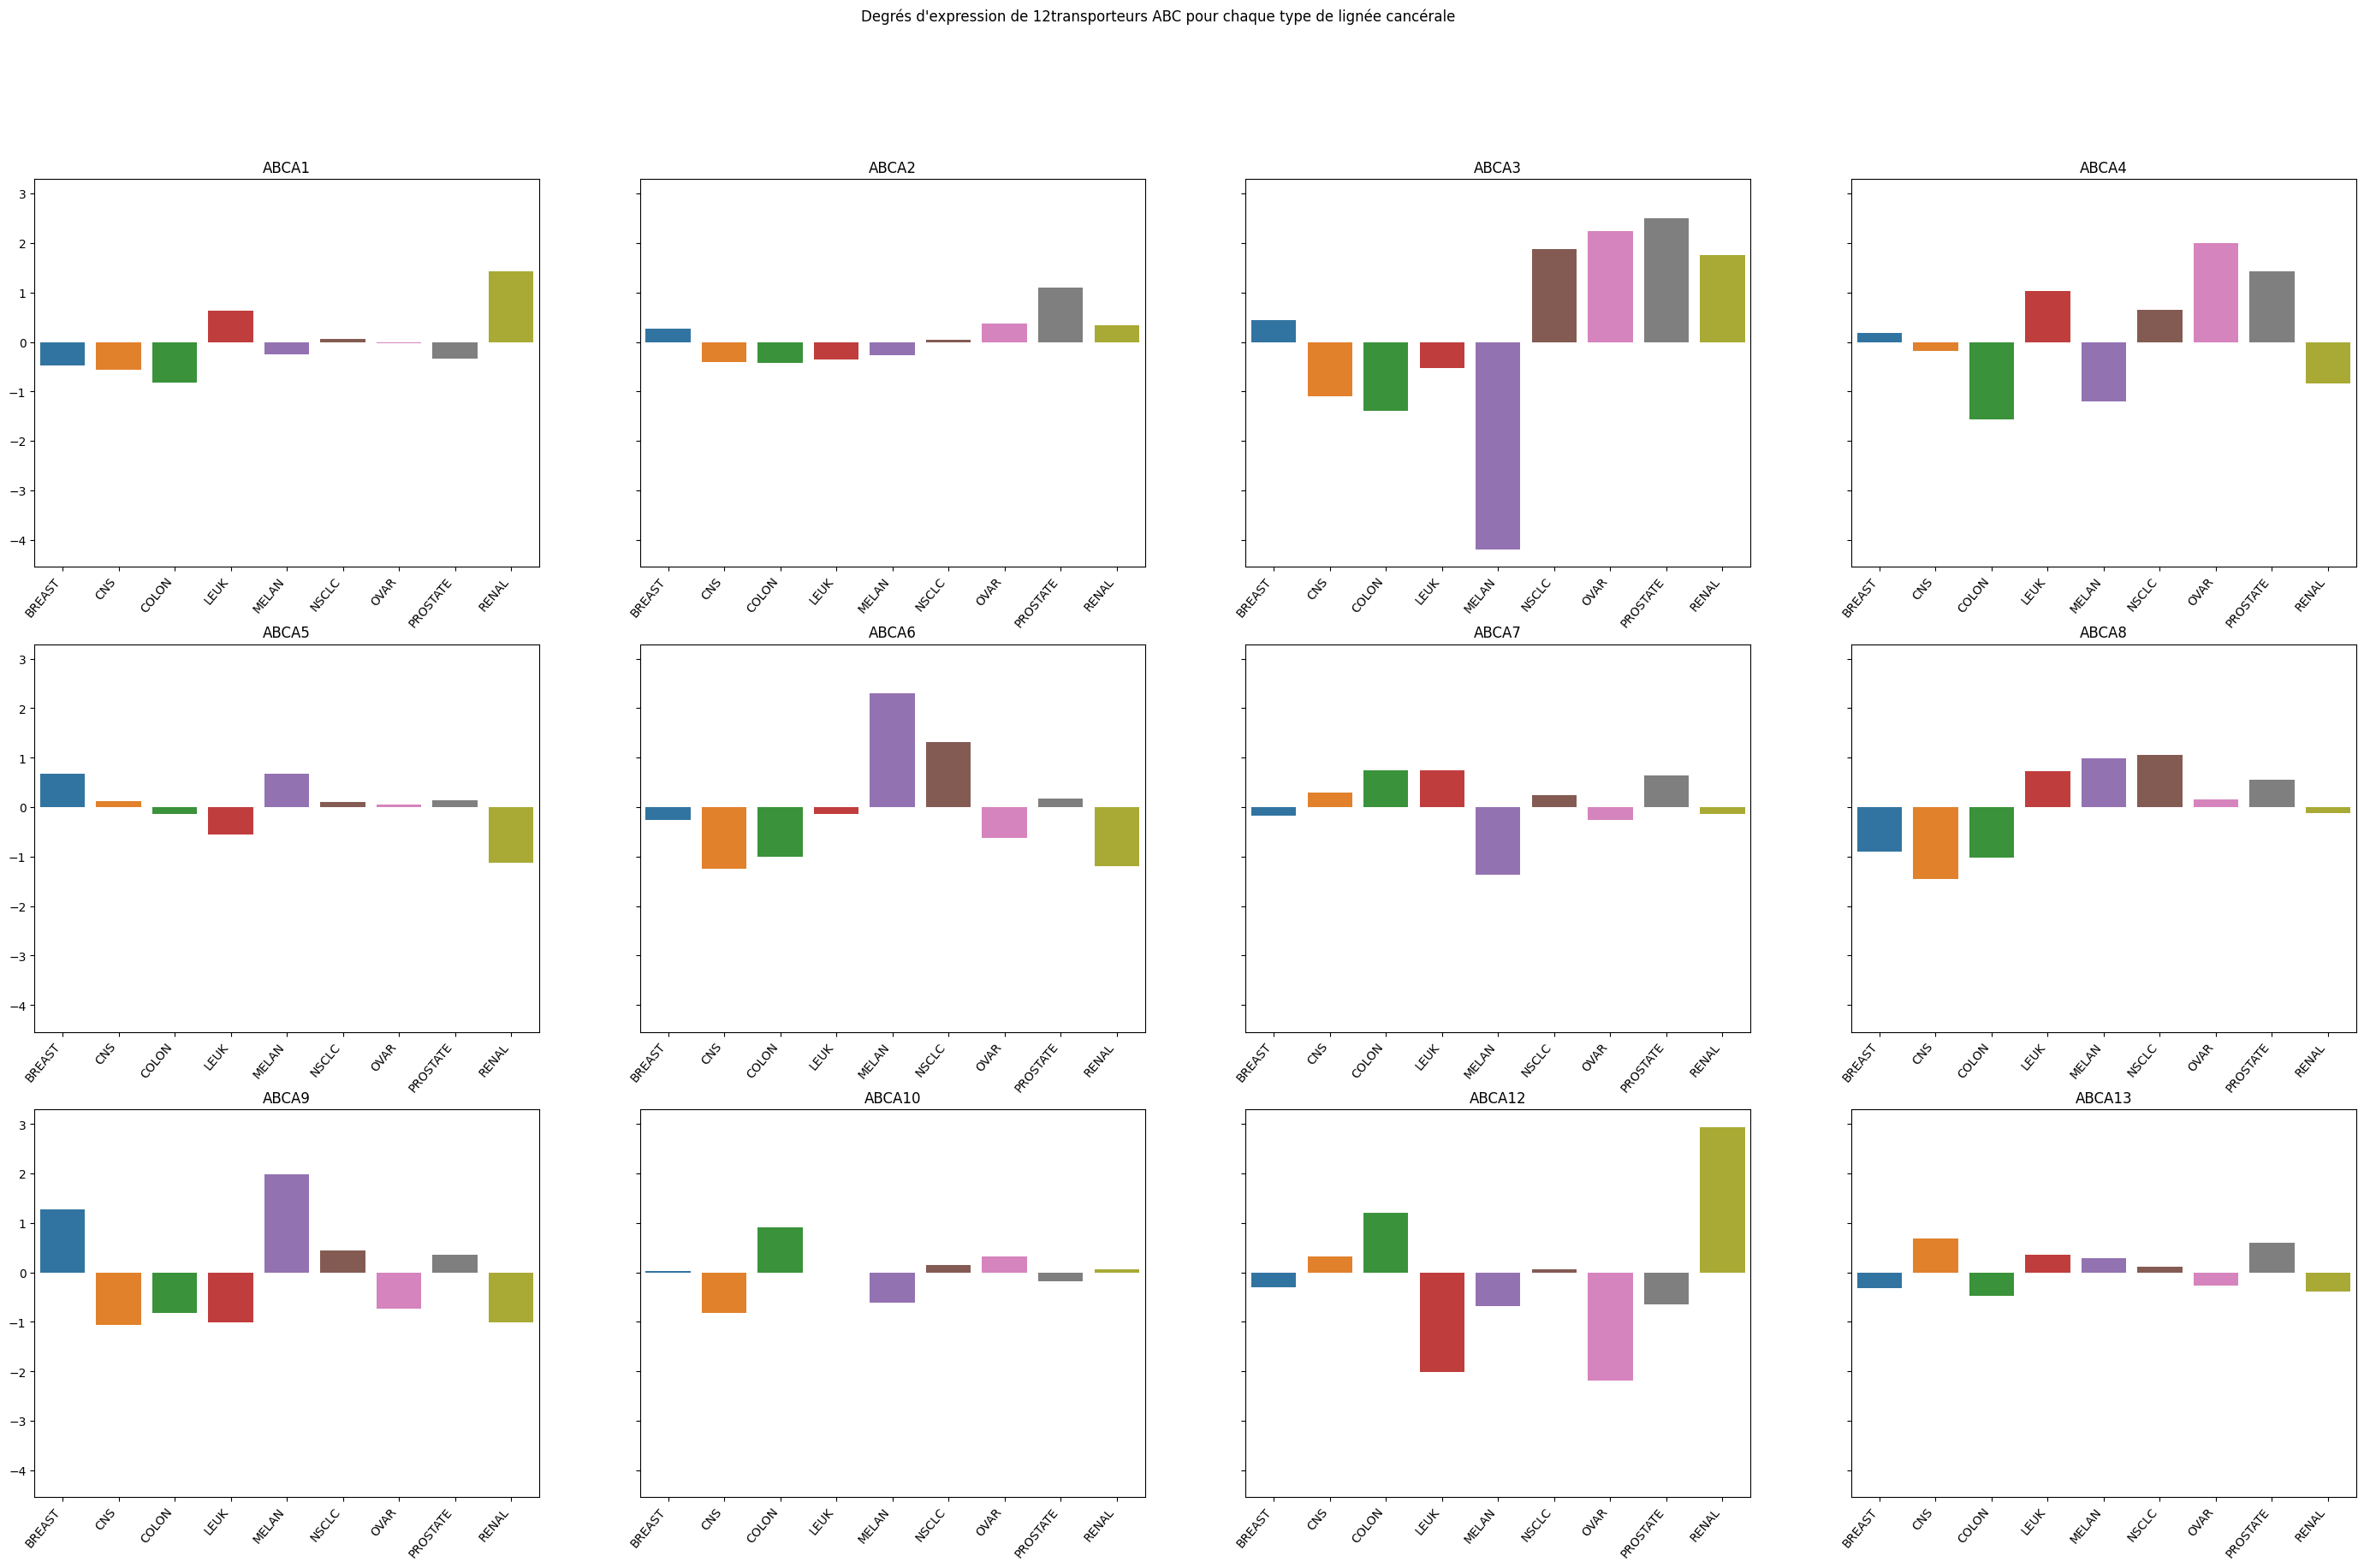

In [102]:
fig, axes = plt.subplots(3, 4, sharey='all', figsize=(35, 20))
fig.suptitle("Degrés d'expression de 12transporteurs ABC pour chaque type de lignée cancérale")
i = 0
j = 0
for name in mean.columns.values[1:13]:
    sns.barplot(ax=axes[j, i], x=mean[name].index, y=mean[name].values)
    axes[j, i].set_title(name)
    axes[j, i].set_xticklabels(rotation=50, ha="right", labels=mean[name].index)
    if i == 3:
        j += 1
        i = 0
    else:
        i += 1

**Visualisation de nos données de 2 façon spécifiques : la première permet de visualiser la moyenne d'expression de l'ensemble des transporteurs de notre dataset pour chacunes des lignés cacnéreuses dans ce dataset, la seconde répsrésnete le degrés d'expression des 12 premiers transporteurs dans chacunes des lignés cancéreuses**

**On peut observer ces moyennes mais la visualisation de l'ensemble des données n'est pas faisable de façon claire**

In [110]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
print(df.shape)
df.head()

(60, 49)


,cancer_type,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,...,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG1,ABCG2,ABCG4,ABCG5,ABCG8
0,BREAST,0.37,-0.67,3.78,-1.13,1.71,2.00,-0.24,-1.11,-1.52,...,-1.26,1.25,1.62,1.05,0.51,-0.68,-0.03,1.37,-0.19,0.89
1,BREAST,-0.50,0.06,-2.88,-0.38,0.44,3.01,-1.65,-1.33,4.54,...,-0.29,0.99,1.16,1.07,0.99,-1.56,0.52,0.60,-0.64,-3.10
2,BREAST,-2.07,0.80,3.79,3.95,0.26,-1.79,-0.83,0.68,-1.61,...,-0.19,-1.22,-0.65,-1.05,-0.63,3.37,1.31,-2.38,0.05,0.81
3,BREAST,0.38,0.47,2.40,-0.76,0.90,0.73,0.92,-3.08,-1.52,...,-0.86,1.35,1.40,0.70,0.56,-1.46,-2.78,-1.86,-0.49,3.18
4,BREAST,0.36,-0.14,0.93,-0.42,0.80,-1.25,0.90,-3.89,-1.07,...,1.54,1.12,1.92,0.20,1.02,0.47,0.59,1.61,0.06,0.27


In [111]:
x = df.iloc[:,1:].values
x = StandardScaler().fit_transform(x)
print(x.shape)

(60, 48)

In [112]:
np.mean(x),np.std(x)

(4.009138700035287e-18, 1.0)

In [115]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_df = pd.DataFrame(x,columns=feat_cols)
normalised_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47
0,0.247813,-0.779542,1.026645,-0.434320,1.497839,1.003978,-0.190734,-0.561214,-0.752927,0.311474,...,-1.168830,1.013146,1.738091,1.133261,0.778462,-0.346573,-0.011697,0.861677,-0.232348,0.336084
1,-0.335407,0.069387,-0.782046,-0.146097,0.385734,1.510691,-1.314421,-0.672462,2.251180,-0.547572,...,-0.269016,0.802384,1.244559,1.154850,1.510414,-0.794860,0.201568,0.377259,-0.781681,-1.170066
2,-1.387885,0.929946,1.029361,1.517909,0.228113,-0.897451,-0.660929,0.343943,-0.797543,0.176722,...,-0.176252,-0.989098,-0.697382,-1.133621,-0.959925,1.716564,0.507895,-1.497502,0.060630,0.305886
3,0.254516,0.546183,0.651871,-0.292130,0.788544,0.366824,0.733717,-1.557392,-0.752927,0.446227,...,-0.797773,1.094209,1.502054,0.755447,0.854707,-0.743918,-1.078026,-1.170363,-0.598570,1.200516
4,0.241109,-0.163196,0.252656,-0.161469,0.700976,-0.626535,0.717778,-1.966988,-0.529850,1.313695,...,1.428570,0.907765,2.059960,0.215714,1.556161,0.239256,0.228711,1.012665,0.072838,0.102046


In [122]:
pca_df = PCA(n_components=2)
principalComponents_df = pca_df.fit_transform(x)
principal_Df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))

Explained variation per principal component: [0.12670687 0.10189645]


<Figure size 640x480 with 0 Axes>

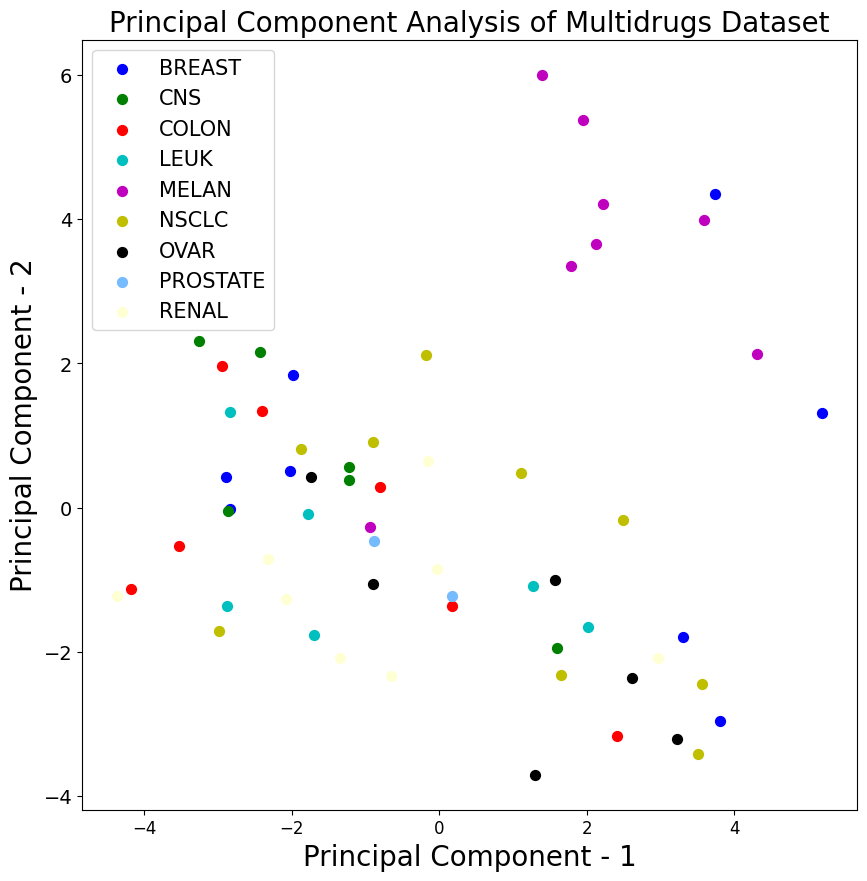

In [119]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Multidrugs Dataset",fontsize=20)
targets = ['BREAST', 'CNS','COLON','LEUK','MELAN','NSCLC','OVAR','PROSTATE','RENAL']
colors = ['b','g','r','c','m','y','k','xkcd:sky blue','xkcd:eggshell']
for target, color in zip(targets,colors):
    indicesToKeep = df['cancer_type'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})